In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from scipy import stats

In [91]:
df = pd.read_csv(r"E:\Developer's arena Internship\Week 7\sales_data_sample.csv",encoding='utf-8', encoding_errors='ignore')

In [92]:
print("Initial shape:", df.shape)
print(df.head())
print(df.info())

Initial shape: (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue

In [93]:
cols_to_drop = [
    'ORDERNUMBER', 'ORDERDATE', 'YEAR_ID', 'PRODUCTCODE', 'PHONE', 'ADDRESSLINE1',
    'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
    'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'CUSTOMERNAME'
]

df = df.drop(columns=cols_to_drop, errors='ignore')

# Drop missing values (optional)
df = df.dropna()

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (2823, 10)


In [94]:
# ============================================================
# LABEL ENCODING FOR STATUS AND DEALSIZE
# ============================================================
label_cols = ['STATUS', 'DEALSIZE', 'PRODUCTLINE']
le = LabelEncoder()

for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# Drop rows with missing values after cleaning
df.dropna(inplace=True)

In [96]:
df.head(5)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,PRODUCTLINE,MSRP,DEALSIZE
0,30,95.70,2,2871.00,5,1,2,1,95,2
1,34,81.35,5,2765.90,5,2,5,1,95,2
2,41,94.74,2,3884.34,5,3,7,1,95,1
3,45,83.26,6,3746.70,5,3,8,1,95,1
4,49,100.00,14,5205.27,5,4,10,1,95,1


In [98]:
# ============================================================
# (C) STANDARD SCALER FOR NUMERICAL COLUMNS
# ============================================================
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("SALES")  # Exclude target variable

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

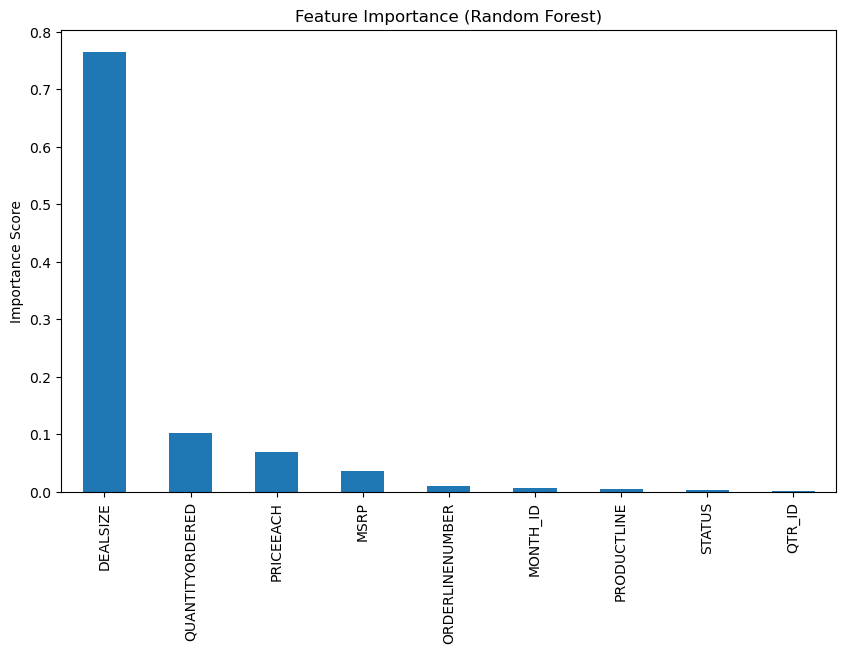

In [99]:
# ============================================================
# (D) FEATURE IMPORTANCE PLOT (TARGET = SALES)
# ============================================================
X = df.drop("SALES", axis=1)
y = df["SALES"]

# Split for model stability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

In [101]:
# ============================================================
# (E) HYPOTHESIS TESTING: t-test on SALES for example groups
# ============================================================
# Example: comparing SALES between two STATUS groups (encoded values)
unique_groups = df['STATUS'].unique()

if len(unique_groups) >= 2:
    group1 = df[df['STATUS'] == unique_groups[0]]['SALES']
    group2 = df[df['STATUS'] == unique_groups[1]]['SALES']

    t_stat, p_value = stats.ttest_ind(group1, group2)

    print("\nHypothesis Test (t-test between two STATUS groups):")
    print("T-statistic:", t_stat)
    print("P-value:", p_value)

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("Result: Reject Null Hypothesis → Significant difference.")
    else:
        print("Result: Fail to Reject Null Hypothesis → No significant difference.")

    # Confidence Interval (95%)
    ci_low = (group1.mean() - group2.mean()) - 1.96 * np.sqrt(group1.var()/len(group1) + group2.var()/len(group2))
    ci_high = (group1.mean() - group2.mean()) + 1.96 * np.sqrt(group1.var()/len(group1) + group2.var()/len(group2))
    
    print(f"95% Confidence Interval for mean difference: ({ci_low:.2f}, {ci_high:.2f})")


Hypothesis Test (t-test between two STATUS groups):
T-statistic: -3.275230564863897
P-value: 0.0010694608474356789
Result: Reject Null Hypothesis → Significant difference.
95% Confidence Interval for mean difference: (-3210.97, -4.27)


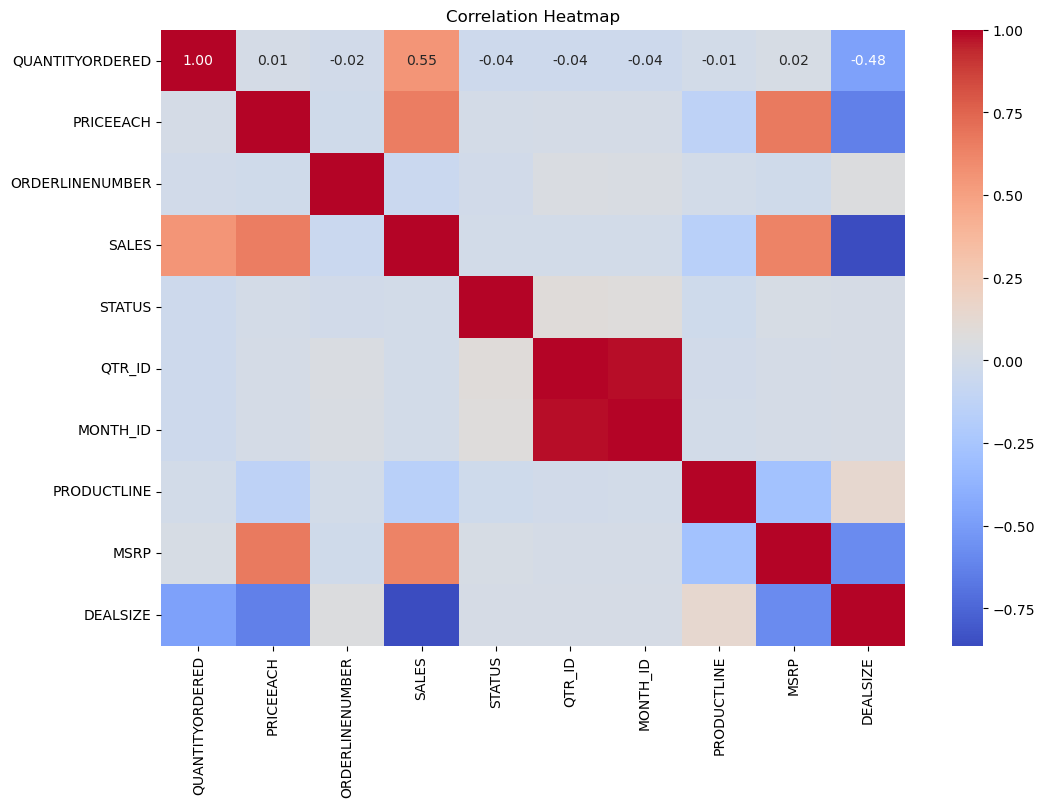


Correlation of SALES with other variables:

SALES              1.000000
PRICEEACH          0.657841
MSRP               0.635239
QUANTITYORDERED    0.551426
STATUS            -0.004828
QTR_ID            -0.006796
MONTH_ID          -0.009605
ORDERLINENUMBER   -0.058400
PRODUCTLINE       -0.160354
DEALSIZE          -0.862814
Name: SALES, dtype: float64


In [103]:
# ============================================================
# (F) CORRELATION BETWEEN SALES AND OTHER VARIABLES
# ============================================================
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Print Sales correlations only
print("\nCorrelation of SALES with other variables:\n")
print(corr['SALES'].sort_values(ascending=False))

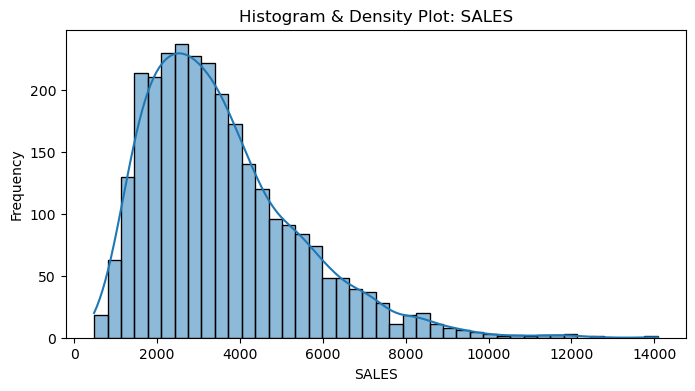

In [105]:
# ============================================================
# HISTOGRAM & DENSITY PLOT FOR SALES ONLY
# ============================================================
plt.figure(figsize=(8, 4))
sns.histplot(df["SALES"], kde=True)
plt.title("Histogram & Density Plot: SALES")
plt.xlabel("SALES")
plt.ylabel("Frequency")
plt.show()

In [106]:
df.head(2)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,PRODUCTLINE,MSRP,DEALSIZE
0,-0.522891,0.596978,-1.057059,2871.0,0.247366,-1.427039,-1.392909,-0.628331,-0.142246,1.015353
1,-0.112201,-0.114450,-0.347015,2765.9,0.247366,-0.596243,-0.572337,-0.628331,-0.142246,1.015353


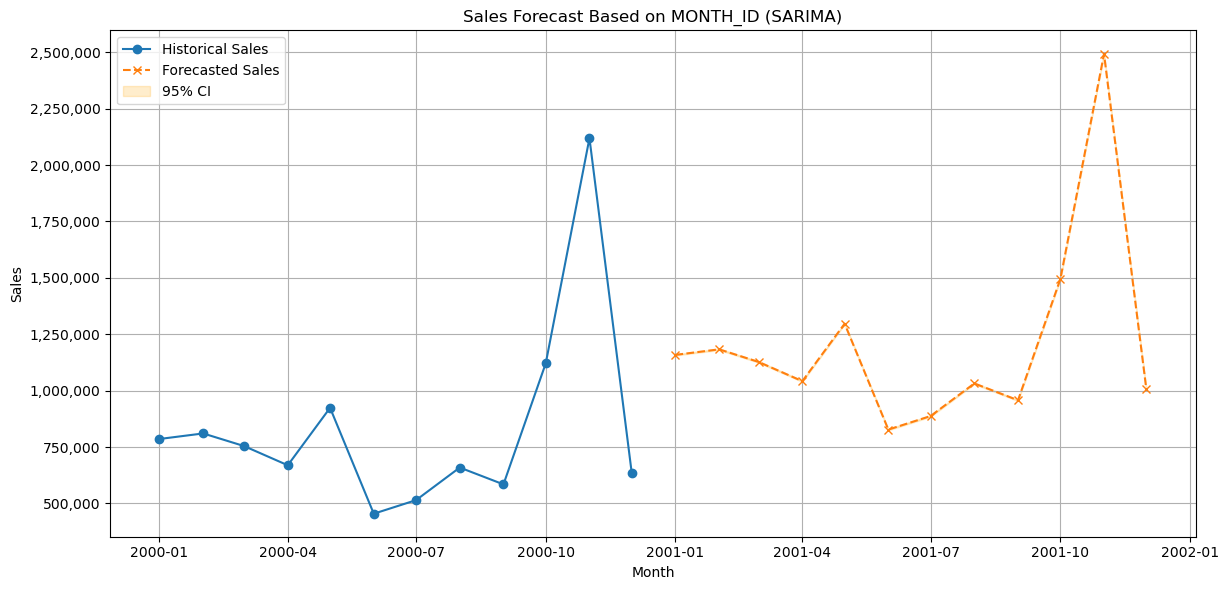

In [107]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))

# Actual data
plt.plot(monthly_sales.index, monthly_sales.values, label="Historical Sales", marker="o")

# Forecast
plt.plot(forecast_mean.index, forecast_mean.values, label="Forecasted Sales", marker="x", linestyle="--")

# Confidence Interval
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2, label="95% CI")

plt.title("Sales Forecast Based on MONTH_ID (SARIMA)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Force y-axis to show plain numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()